In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

## Pour f = 0

In [2]:
qc = QuantumCircuit(2,1)
qc.x(1)

qc.h(0)
qc.h(1)

qc.barrier()

qc.barrier()

qc.h(0)

qc.measure(0,0)

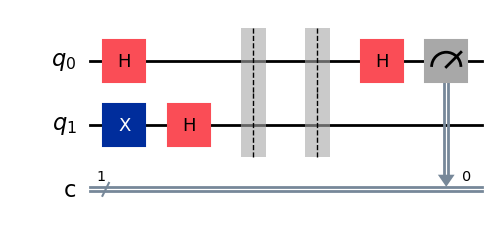

In [3]:
qc.draw('mpl')

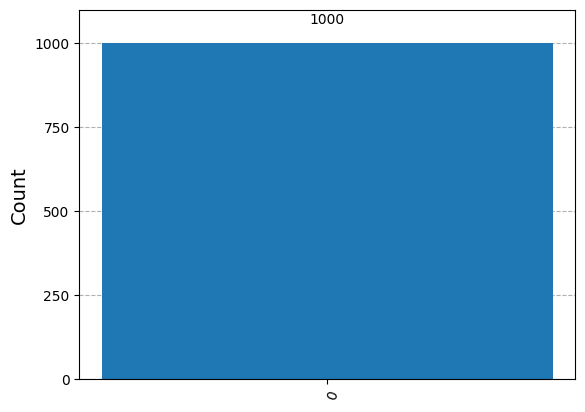

In [4]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

## Pour f = 1

In [5]:
qc = QuantumCircuit(2,1)
qc.x(1)

qc.h(0)
qc.h(1)

qc.barrier()

qc.x(1)

qc.barrier()

qc.h(0)

qc.measure(0,0)

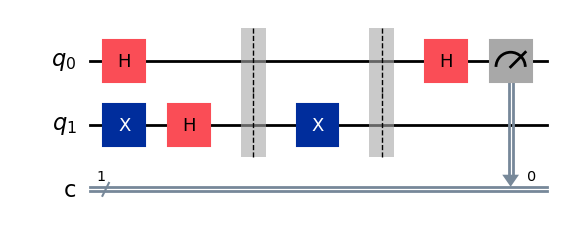

In [6]:
qc.draw('mpl')

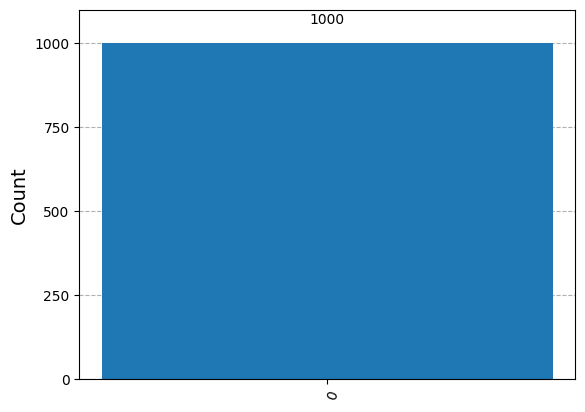

In [7]:
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

## Pour f = x

In [8]:
qc = QuantumCircuit(2,1)
qc.x(1)

qc.h(0)
qc.h(1)

qc.barrier()

qc.cx(0,1)

qc.barrier()

qc.h(0)

qc.measure(0,0)

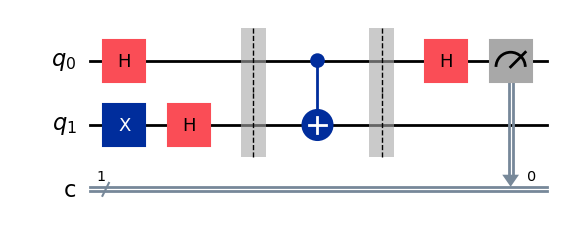

In [9]:
qc.draw('mpl')

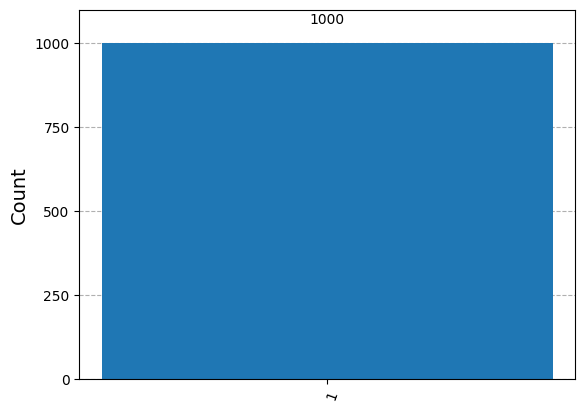

In [10]:
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

## Pour f = not(x)

In [11]:
qc = QuantumCircuit(2,1)
qc.x(1)

qc.h(0)
qc.h(1)

qc.barrier()

qc.x(0)
qc.cx(0,1)
qc.x(0)

qc.barrier()

qc.h(0)

qc.measure(0,0)

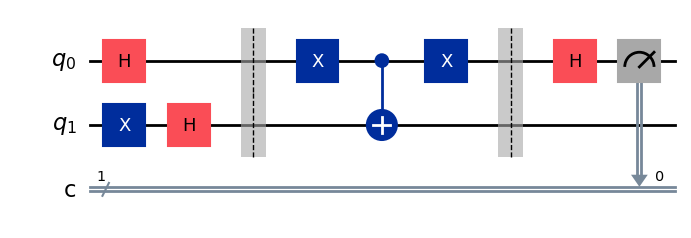

In [12]:
qc.draw('mpl')

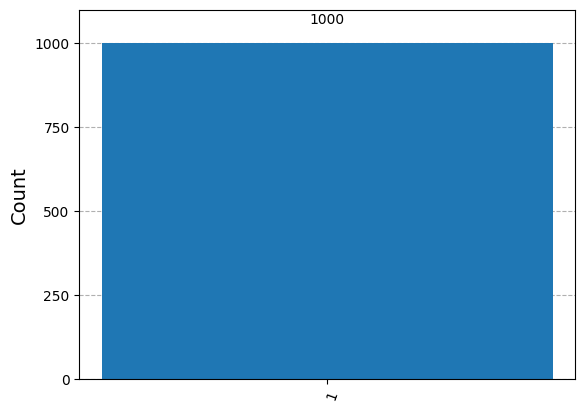

In [13]:
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()  # obtain results of a run
counts = result.get_counts()
plot_histogram(counts)

## On essaye maintenant de faire tourner l'algorithme sur une vraie machine. On utilise pour ça le dernier circuit où f(x) = not(x)

### Il faut pour ça aller sur https://www.ibm.com/quantum et vous créer un compte. 
### Il faut également installer une autre librairie. Pour cela, rouvrez un terminal et déplacez-vous jusqu'au dossier que vous aviez créé en première semaine: cd Desktop/myfiles/nom_dossier
### Puis, réactivez votre environnement: source nom_env/bin/activate
### Enfin, installez la librairie manquante : pip install qiskit_ibm_runtime
### Une fois ceci fait, vous pouvez fermer le terminal et lancer le notebook. Si vous avez des erreurs, essayez de relancer VsCode.

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService.save_account(channel="ibm_quantum", token="<YOUR_API_KEY>") 
## Si c'est la premiere fois que vous le faites sur votre machine, utilisez cette ligne en remplacant le token par le vôtre. Vous le trouvez sur ibm_quantum une fois votre compte créé, sur le dashboard.

# service = QiskitRuntimeService() #Les fois d'après, utilisez ça : votre compte a été sauvé sur votre machine, donc plus besoin de copy paste le token à chaque fois.


In [24]:
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=1) # Ici, on choisit une des machines, on prend la moins occupée
print(backend.name)

ibm_sherbrooke


In [25]:
from qiskit import transpile
qc_transpiled = transpile(qc, backend, optimization_level=2) # Ici, on transpile : on traduit notre circuit et ses gates en d'autres gates que le vrai quantum computer peut appliquer

In [26]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend=backend)
qc_job = sampler.run([qc_transpiled], shots=1000) # Ici, on envoie notre circuit à la machine et on attend. Vous pouvez vérifier que tout fonctionne bien en allant sur votre dashboard sur ibm_quantum et vous devriez voir votre job en attente, avec une estimation du temps d'attente.

/var/folders/c4/sgxdk2g56dx90j4nw9824_sw0000gn/T/ipykernel_70845/3239729695.py:3: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)


In [27]:
job_id = qc_job.job_id() # On récupère l'id du job pour pouvoir obtenir les résultats une fois le calcul fini

In [28]:
job = service.job(job_id)
job_result = job.result() # On récupère les résultats, qui sont toujours sous une forme bizarre

In [29]:
qc_transpiled.cregs # On recupere le nom du "registre classique", où on a nos résultats **peu important**

[ClassicalRegister(1, 'c')]

In [30]:
counts = job_result[0].data.c.get_counts() #et enfin on obtient nos resultats sous forme de map

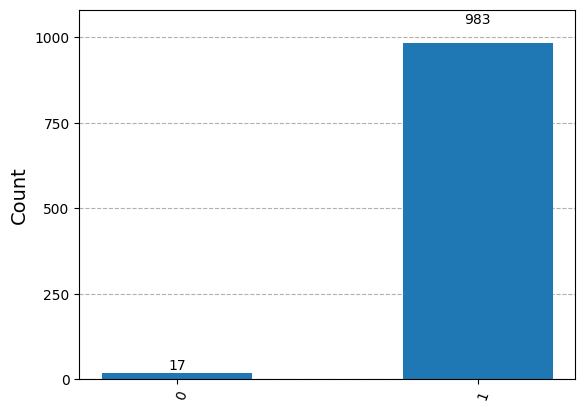

In [31]:
plot_histogram(counts) # et on voit que sur la vraie machine, on n'obtient plus 100% de 1 ! On voit tout de même que le bruit ne détruit pas complètement le résultat. C'est dû au fait que notre circuit comporte peu de gates, et qu'on ne mesure qu'un seul qubit. 